# Classifying Fashion-MNIST

[Fashion-MNIST dataset](https://github.com/zalandoresearch/fashion-mnist), Fashion-MNIST是一套28x28灰度图像的衣服。它比MNIST更复杂，因此它可以更好地表示网络的实际性能，并更好地表示您将在现实世界中使用的数据集。

<img src='assets/fashion-mnist-sprite.png' width=500px>

各种衣服那么多~

In [1]:
import torch # pytorch 神经网络主要功能
import numpy as np
from torchvision import datasets, transforms# torch 的视觉功能
import helper #这是一个附加的包

transform = transforms.Compose([transforms.ToTensor()]) # 这个的作用就是将loaded 图片  →变为 tensor 就是数字s。
#这里还能添加更多功能 

# 将数据下载，使用的是dataset的功能，选择FashionMNIST 这个数据集
trainset = datasets.FashionMNIST('~/.pytorch/F_MNIST_data/', #选择路径，保存/读取文件的地址
                                 download=True,#如果没有这个文件 我们就下载下来
                                 train=True, #我们选择下载的是training set
                                 transform=transform) # 将我们设定好的transform model

#这个的作用生成一个batch 一个batch的data，给到我们的神经网络练习
trainloader = torch.utils.data.DataLoader(trainset,#上面刚刚做好的training set
                                          batch_size=64,#batch size的大小
                                          shuffle=True # 我们是否打乱这个data
                                         )

# 这个就是testing， 我们可以看到最大的不同就是 train = False
testset = datasets.FashionMNIST('~/.pytorch/F_MNIST_data/', download=True, train=False, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=64, shuffle=True)

Here we can see one of the images.

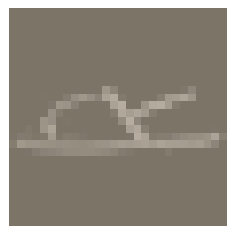

In [2]:
# trainloader 是一个gennerater ，我们要读取它的信息，我们就要iter 它出来
# 前图，后对应的label 
image, label = next(iter(trainloader))

#使用helper的 imshow 功能读取，我们的第一张图片，这是一件xx！
helper.imshow(image[0,:]);

## Building the network

Here you should define your network. As with MNIST, each image is 28x28 which is a total of 784 pixels, and there are 10 classes. You should include at least one hidden layer. We suggest you use ReLU activations for the layers and to return the logits or log-softmax from the forward pass. It's up to you how many layers you add and the size of those layers.

In [3]:
# TODO: Define your network architecture here
from torch import nn, optim # nn是我们的主网络，optim是我们的优化器
import torch.nn.functional as F  #这个就是我们在这个网络中将会用到的function

# 我们开始搭网络的啦~ 因为这个一张图片size是 28*28

class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(28*28,512)
        self.fc2 = nn.Linear(512,256)
        self.fc3 = nn.Linear(256,64)
        self.fc4 = nn.Linear(64,10)
        
    def forward(self,x):
        x = x.view(x.shape[0], -1) # 改变图片shape ，变为 batch * 784
        
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
        x = F.log_softmax(self.fc4(x),dim = 1)
        
        return x

net = Net()
print(net)
        
        

Net(
  (fc1): Linear(in_features=784, out_features=512, bias=True)
  (fc2): Linear(in_features=512, out_features=256, bias=True)
  (fc3): Linear(in_features=256, out_features=64, bias=True)
  (fc4): Linear(in_features=64, out_features=10, bias=True)
)


# Train the network

我们把网络搭建好了，剩下的首先是要去定义我们的loss function [the criterion](http://pytorch.org/docs/master/nn.html#loss-functions) ( 我们这是一个Multi-classification Problem  `nn.CrossEntropyLoss`) and [the optimizer](http://pytorch.org/docs/master/optim.html) (优化器的意思是我们调整parameter的方式 `optim.SGD` or `optim.Adam`).


In [4]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(net.parameters(),lr= 0.002)


In [5]:
# TODO: Train the network here
EPOCH = 30
for e in range(EPOCH):
    training_loss = 0
    for images,labels in trainloader:
        log_out = net(images) #求出结果
        loss = criterion(log_out,labels) # 根据结果更新我们的loss
        
        optimizer.zero_grad() # 将gradient 调零，不然它会一直累计，这样会影响计算
        loss.backward()  # 根据loss 我们来求backward的size
        optimizer.step() # 我们调整optimizer
        
        training_loss += loss.item() # 这里要用loss item 才能将tensor 里面的值读出来
    print('In the ',e+1,'Epoch. Training loss is : ', training_loss)

In the  1 Epoch. Training loss is :  483.68418684601784
In the  2 Epoch. Training loss is :  347.97927744686604
In the  3 Epoch. Training loss is :  315.699803724885
In the  4 Epoch. Training loss is :  294.3341750726104
In the  5 Epoch. Training loss is :  274.9316511899233
In the  6 Epoch. Training loss is :  263.9273451268673
In the  7 Epoch. Training loss is :  250.8651894107461
In the  8 Epoch. Training loss is :  242.76907285302877
In the  9 Epoch. Training loss is :  229.18312229961157
In the  10 Epoch. Training loss is :  224.19155541434884
In the  11 Epoch. Training loss is :  216.02871127426624
In the  12 Epoch. Training loss is :  213.10213059559464
In the  13 Epoch. Training loss is :  201.5114964619279
In the  14 Epoch. Training loss is :  194.57320965081453
In the  15 Epoch. Training loss is :  195.1904526129365
In the  16 Epoch. Training loss is :  184.38453831523657
In the  17 Epoch. Training loss is :  181.95738265290856
In the  18 Epoch. Training loss is :  176.300764

### 我们可以看到Loss 在不断地下降，我们的神经网络确实在不断地进步！

tensor(6)


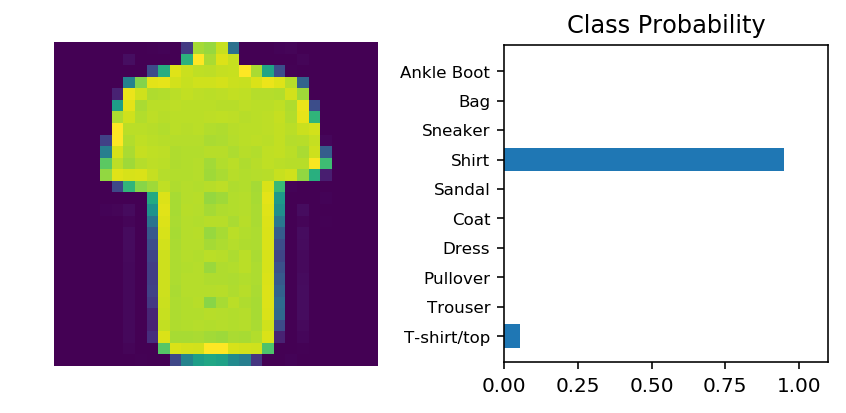

In [6]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import helper

# Test out your network!

dataiter = iter(testloader)
images, labels = dataiter.next()
img = images[0]
# Convert 2D image to 1D vector
img = img.resize_(1, 784)
print(labels[0])

# TODO: Calculate the class probabilities (softmax) for img
ps = torch.exp(net(img))

# Plot the image and probabilities
helper.view_classify(img.resize_(1, 28, 28), ps, version='Fashion')


In [7]:
classes = ['T-shirt/top', 'Trouser', 'Pullover','Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag','Ankle boot']

### 可视化的结果如上

In [8]:
### Test 结果，我们将训练好的model 对用test 进行检测
### 我们来看看我们这个model 有什么惊人的成绩， 经过50次迭代以后 ！
test_loss = 0.0
class_correct = list(0. for i in range(10)) # 同样地，我们定义一个长度为10 的list 存下我们的数据，这是for 正确的
class_total = list(0. for i in range(10)) # 这个是我们做出的total 的结果

net.eval() # 开启评价模式 

for images, labels in testloader: 
    # 换汤不换药 
    output = net(images)

    loss = criterion(output, labels)

    test_loss += loss.item() * labels.size(0) # 这里都是算我们的loss ，补充一下，size(0)就是我们的第一个维度，batch size

    
    _, pred = torch.max(output, 1) # 我们这个max 会返回，最大值和它所在的位置
    # pred 代表的就是哪一个node，就是我们最终选的数字是啥！
    
    correct = np.squeeze(pred.eq(labels.data.view_as(pred)))
    
    # 每一个结果，照着10个class 一个个看
    for i in range(len(labels)): 
        label = labels.data[i]
        class_correct[label] += correct[i].item()
        class_total[label] += 1

# 跳出循环后，算平均的loss score ，可以和我们的 training比比啊~
test_loss = test_loss/len(testloader.sampler)
print('Test Loss: {:.6f}\n'.format(test_loss))

#看每一个分类的结果!
for i in range(10):
    if class_total[i] > 0:
        print('Test Accuracy of %5s: %2d%% (%2d/%2d)' % (
            classes[i], # 对应的阿拉伯数字 
            100 * class_correct[i] / class_total[i], # 对应的做出的选择然后是对的！
            np.sum(class_correct[i]), np.sum(class_total[i]))) # 打印选择的次数啥啥的 
    else:
        print('Test Accuracy of %5s: N/A (no training examples)' % (classes[i]))

print('\nTest Accuracy (Overall): %2d%% (%2d/%2d)' % (
    100. * np.sum(class_correct) / np.sum(class_total), # 这里total 就是accuracy ！！ 请问上面的是什么指标呢，每个class？
    np.sum(class_correct), np.sum(class_total)))

Test Loss: 0.452352

Test Accuracy of T-shirt/top: 87% (872/1000)
Test Accuracy of Trouser: 97% (978/1000)
Test Accuracy of Pullover: 84% (845/1000)
Test Accuracy of Dress: 88% (886/1000)
Test Accuracy of  Coat: 82% (820/1000)
Test Accuracy of Sandal: 97% (972/1000)
Test Accuracy of Shirt: 66% (660/1000)
Test Accuracy of Sneaker: 96% (964/1000)
Test Accuracy of   Bag: 95% (953/1000)
Test Accuracy of Ankle boot: 95% (956/1000)

Test Accuracy (Overall): 89% (8906/10000)


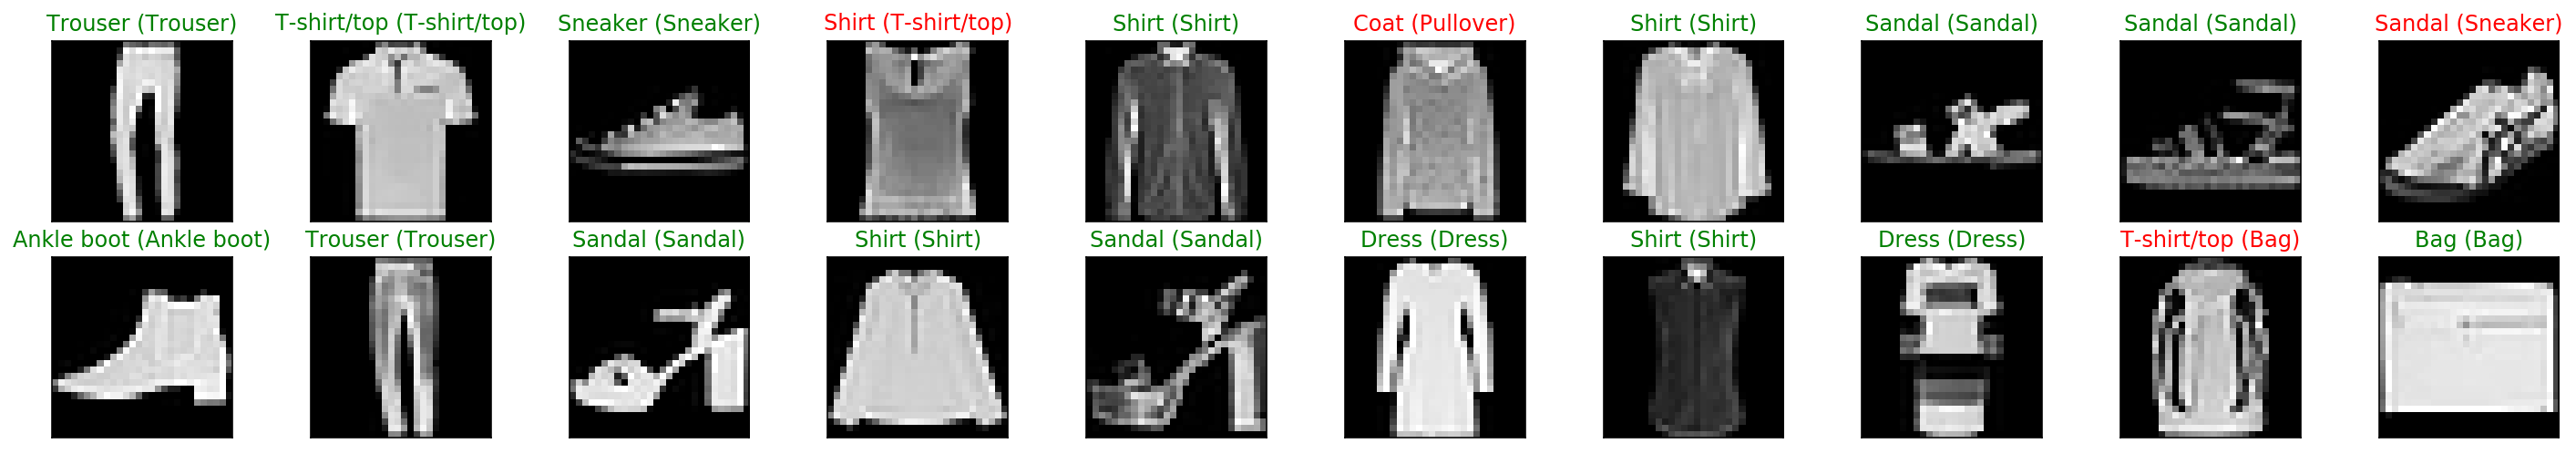

In [9]:
#结果可视化！

import matplotlib.pyplot as plt
dataiter = iter(testloader)
images, labels = dataiter.next()
images.numpy()#我们要作图的话，不能直接用tensor



# 使用model 做出predict
output = net(images)

_, preds_tensor = torch.max(output, 1)
preds = preds_tensor.numpy()


fig = plt.figure(figsize=(25, 4))
for idx in range(20):
    ax = fig.add_subplot(2, 20/2, idx+1, xticks=[], yticks=[])
    ax.imshow(np.squeeze(images[idx]),cmap = 'gray')
    ax.set_title("{} ({})".format(classes[preds[idx]], classes[labels[idx]]),
                 color=("green" if preds[idx]==labels[idx].item() else "red"))
    
## 一张张打印出来，然后看看结果